Merged DataFrame columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_trans', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_prod'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   CustomerName     1000 non-null   object 
 7   Region           1000 non-null   object 
 8   SignupDate       1000 non-null   object 
 9   ProductName      1000 non-null   object 
 10  Category         1000 non-null   object 
 11  Price            1000 non-null   flo

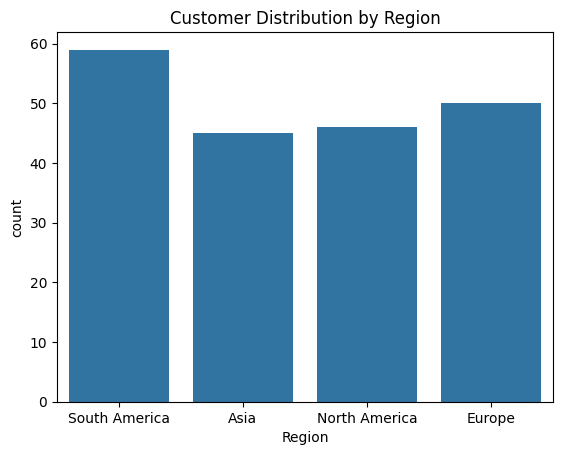

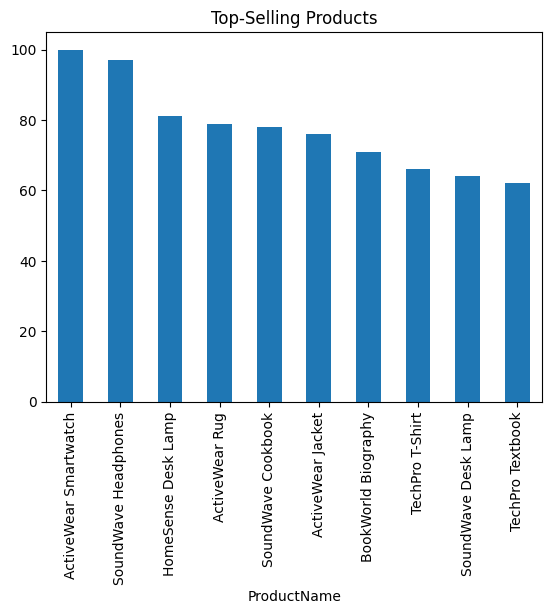

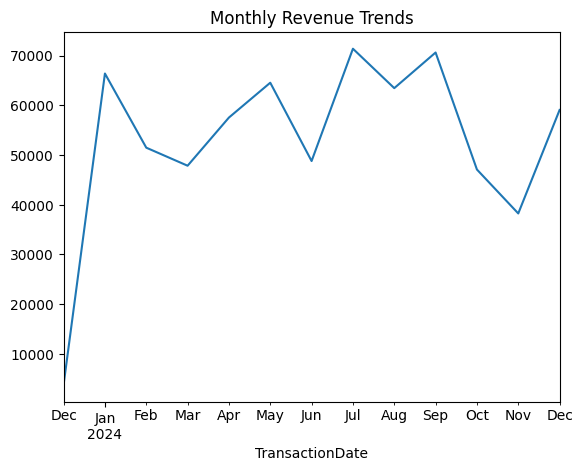

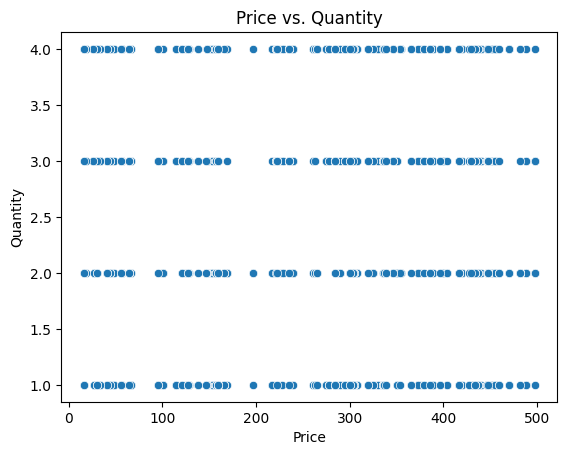

In [12]:
# --- Task 1: Exploratory Data Analysis (EDA) ---
# Ensure 'Price' column exists in products before merging
if 'Price' not in products.columns:
    raise ValueError("Error: 'Price' column is missing in the products dataset.")

# Merge datasets with explicit suffixes to handle duplicate columns
merged_data = transactions.merge(customers, on="CustomerID").merge(
    products, on="ProductID", suffixes=("_trans", "_prod")
)

# Verify the merged columns
print("Merged DataFrame columns:", merged_data.columns)

# Ensure the correct 'Price' column is used
if "Price_prod" in merged_data.columns:
    merged_data["Price"] = merged_data["Price_prod"]
    merged_data.drop(columns=["Price_trans", "Price_prod"], inplace=True)
elif "Price_trans" in merged_data.columns:
    merged_data["Price"] = merged_data["Price_trans"]
    merged_data.drop(columns=["Price_trans"], inplace=True)
else:
    raise ValueError("Error: 'Price' column is missing after merging.")

# Calculate TotalValue if not present
if 'TotalValue' not in merged_data.columns:
    merged_data['TotalValue'] = merged_data['Quantity'] * merged_data['Price']

# Basic EDA
print(merged_data.info())
print(merged_data.describe())

# Missing values check
print(merged_data.isnull().sum())

# Visualizations
# 1. Distribution of customers by region
sns.countplot(data=customers, x="Region")
plt.title("Customer Distribution by Region")
plt.show()

# 2. Top-selling products
top_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="bar", title="Top-Selling Products")
plt.show()

# 3. Revenue trends over time
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
revenue_trend = merged_data.groupby(merged_data["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()
revenue_trend.plot(title="Monthly Revenue Trends")
plt.show()

# 4. Correlation between price and quantity
sns.scatterplot(data=merged_data, x="Price", y="Quantity")
plt.title("Price vs. Quantity")
plt.show()
